In [1]:
%matplotlib inline

# Tarea 6: Reducción de Dimensiones: Datos de tejido canceroso

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la sección de la tarea 6 relacionada con la identificación de tejido canceroso.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Cargar datos de tejido canceroso

Los datos quedarán almacenados en X y las etiquetas en y

In [3]:
archivo_csv = 'cancer.csv' 

col_label = 1 ## Columna en el CSV con las etiquetas 'B'enigno o 'M'aligno
col_feats = 2 ## Columna en el CSV a partir de la cual se encuentran las características

horizontal=12  ## Tamaño de las figuras
figsize=(horizontal,horizontal/(16/9))

Cargar todos los datos en archivo csv

In [4]:
## Es necesario manejar manualmente la conversión del caracter en la 1era columna a número
converters={}
for i in range(32):
    converters[i] = lambda x : float(x)
converters[col_label] =  lambda x : 1.0 if (x==b'M') else 0.0

data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)
print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 569 x 32


In [5]:
# La columna col_labels tiene las etiquetas
y=data[:,col_label].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=data[:,col_feats:32]
print("Data shape :",X.shape)


Label shape: (569,)
Data shape : (569, 30)


### Normalización de los datos

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("X normalized",X_normalized)
print(X_normalized.shape)


X normalized [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
(569, 30)


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

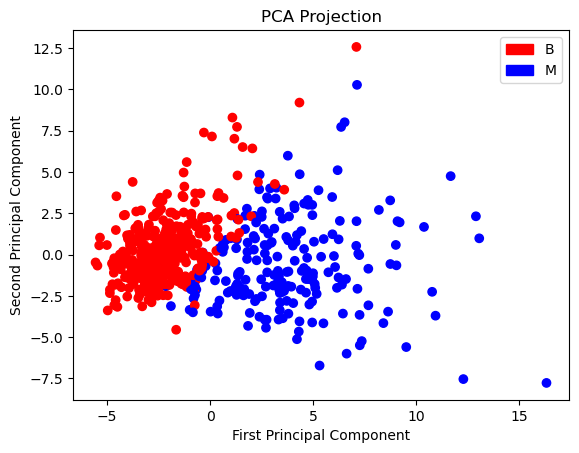

In [10]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='B')
blue_patch = mpatches.Patch(color='blue', label='M')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

In [11]:
# Visualizar los dos primeros componentes principales
print('Primer componente principal:', pca.components_[0])
print('Segundo componente principal:', pca.components_[1])

# Visualizar los eigenvalores de los dos primeros componentes principales
print('Eigenvalor del primer componente principal:', pca.explained_variance_[0])
print('Eigenvalor del segundo componente principal:', pca.explained_variance_[1])

Primer componente principal: [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
Segundo componente principal: [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
Eigenvalor del primer componente principal: 13.304990794374548
Eigenvalor del segundo componente principal: 5.701374603726144


### Métodos de reducción de dimensiones (no supervisado):

## KPCA

In [12]:
from sklearn.decomposition import KernelPCA

In [13]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/100)
X_kpca = kpca.fit_transform(X_normalized)
print(X_kpca)

[[ 0.64242785  0.18549604]
 [ 0.30631396 -0.41560547]
 [ 0.64533348 -0.1294642 ]
 ...
 [ 0.16374648 -0.25497195]
 [ 0.70907121  0.16515992]
 [-0.37057486  0.00159553]]


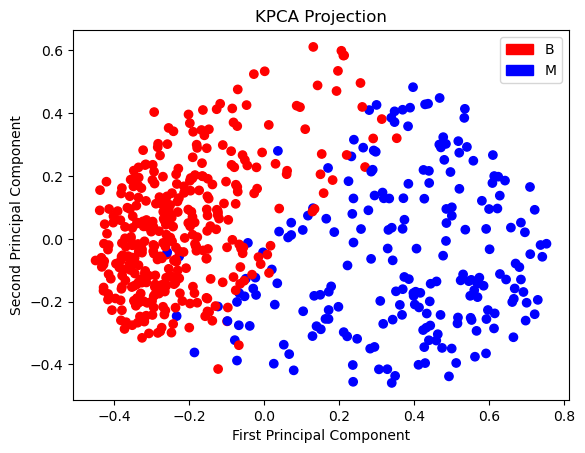

In [14]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KPCA Projection')

red_patch = mpatches.Patch(color='red', label='B')
blue_patch = mpatches.Patch(color='blue', label='M')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# ISOMAP

In [15]:
from sklearn.manifold import Isomap

In [16]:
isomap = Isomap(n_components=2)

X_isomap = isomap.fit_transform(X_normalized)

print(X_isomap)

[[18.68631676 -1.11216213]
 [ 7.61830865 -4.432485  ]
 [12.75025732 -2.86735301]
 ...
 [ 1.74619448 -3.6403823 ]
 [17.24982371  1.37031912]
 [-8.82185652 -5.10804389]]


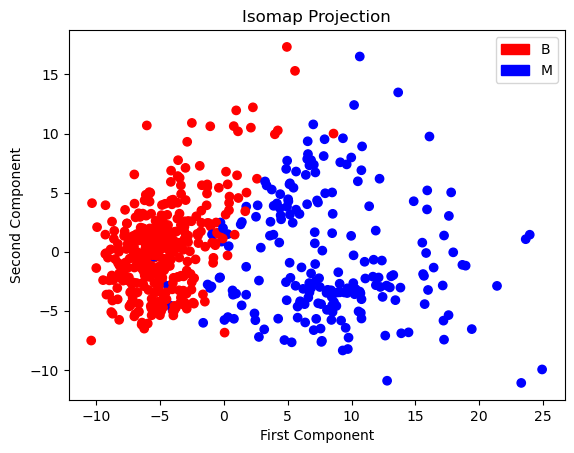

In [17]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Isomap Projection')

red_patch = mpatches.Patch(color='red', label='B')
blue_patch = mpatches.Patch(color='blue', label='M')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

### Métodos de reducción de dimensiones (supervisado):

# PLS

In [18]:
from sklearn.cross_decomposition import PLSRegression

In [19]:
# Linear Discriminant Analysis (LDA)
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_normalized, y)[0]

# print the transformed data
print("LDA transformed data:")
print(X_pls)

LDA transformed data:
[[ 8.58231845  2.63041941]
 [ 2.89579184 -2.14615361]
 [ 5.80534387 -0.50808951]
 ...
 [ 1.52247787 -1.16266418]
 [10.19611015 -0.04309317]
 [-5.27294149 -0.72193978]]


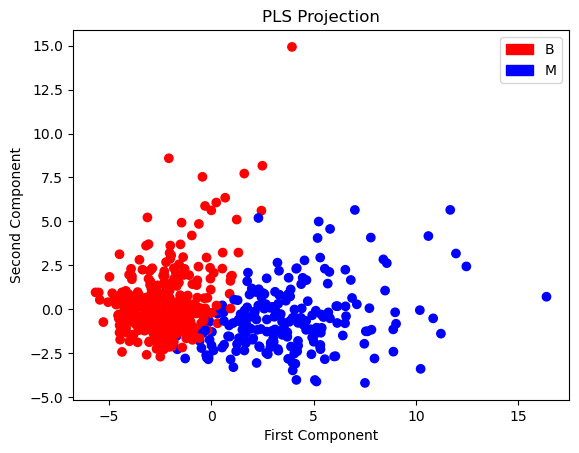

In [20]:


colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PLS Projection')

red_patch = mpatches.Patch(color='red', label='B')
blue_patch = mpatches.Patch(color='blue', label='M')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# UMAP

In [21]:
import umap

In [22]:
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X_normalized, y)

# print the transformed data
print("UMAP transformed data:")
print(X_umap)

UMAP transformed data:
[[ 7.478309  13.248956 ]
 [ 5.5960517 13.1436825]
 [ 7.047161  13.18327  ]
 ...
 [ 5.0556145 12.613424 ]
 [ 7.6156316 13.386004 ]
 [20.625456  20.33549  ]]


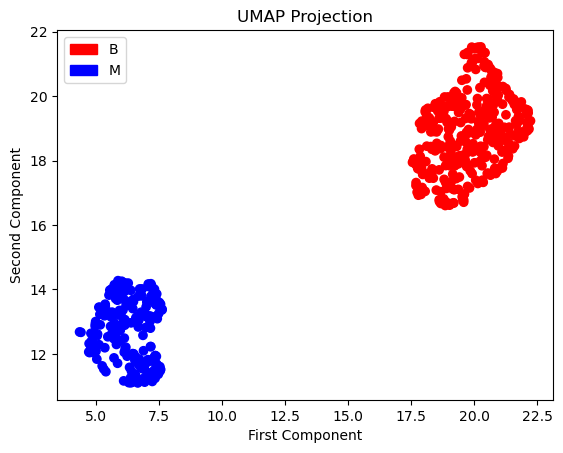

In [23]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('UMAP Projection')

red_patch = mpatches.Patch(color='red', label='B')
blue_patch = mpatches.Patch(color='blue', label='M')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# PaCMAP

In [24]:
import pacmap

In [25]:
# PaCMAP
reducer = pacmap.PaCMAP(n_components =2)
X_pacmap = reducer.fit_transform(X_normalized)

# print the transformed data
print("PaCMAP transformed data:")
print(X_pacmap)

PaCMAP transformed data:
[[ 6.993489    2.8017926 ]
 [ 7.5607696  -2.0440965 ]
 [ 7.136713    0.92970836]
 ...
 [ 5.0892935  -3.060379  ]
 [ 6.9854555   2.7620738 ]
 [-5.922539    1.8924867 ]]


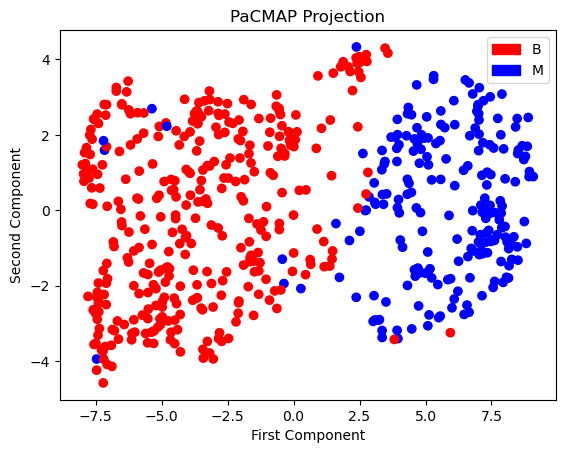

In [26]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PaCMAP Projection')

red_patch = mpatches.Patch(color='red', label='B')
blue_patch = mpatches.Patch(color='blue', label='M')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

### Aglomeración 

## K-means

In [27]:
from sklearn.cluster import KMeans

In [28]:
def find_clusters(X, k, random_state=0):
    # create an instance of the KMeans class
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    
    # fit the data
    kmeans.fit(X)
    
    # get the cluster assignments
    clusters = kmeans.predict(X)
    
    return clusters

In [29]:
clusters = find_clusters(X_normalized, 2)

# print the cluster assignments
print("Cluster assignments:")
print(clusters)

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster assignments:
[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0

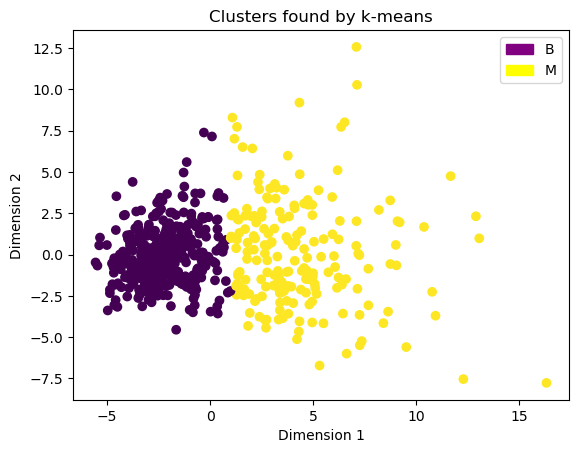

In [30]:
# create a scatter plot of the first two dimensions of the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')

# add axis labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# add a title
plt.title('Clusters found by k-means')

# Agregar leyenda
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='purple', label='B')
blue_patch = mpatches.Patch(color='yellow', label='M')
plt.legend(handles=[red_patch, blue_patch])


# show the plot
plt.show()

In [31]:
# Gaussian Mixture

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [33]:
# Assuming you have X_normalized as input data and y as output labels
n_features = X_normalized.shape[1]

# Create a Gaussian Mixture model for each class
gm_class_0 = GaussianMixture(n_components=3)
gm_class_1 = GaussianMixture(n_components=3)

# Fit the models to the data of each class

gm_class_0.fit(X_normalized[y==0])
gm_class_1.fit(X_normalized[y==1])

# Compute the posterior probabilities for each class
posterior_0 = gm_class_0.score_samples(X_normalized) + np.log(np.mean(y==0))
posterior_1 = gm_class_1.score_samples(X_normalized) + np.log(np.mean(y==1))

# Select the winning class based on the highest posterior probability
y_pred = (posterior_1 > posterior_0).astype(int)

In [34]:
import pandas as pd

def compute_bic_table(X, max_components=10, covariance_types=['full', 'tied', 'diag', 'spherical']):
    """Compute a table of BIC scores for different numbers of components and types of covariance.
    
    Args:
        X: Input data.
        max_components: Maximum number of components to consider.
        covariance_types: List of covariance types to consider.
        
    Returns:
        bic_table: DataFrame containing the BIC scores.
    """
    # Initialize the BIC table
    bic_table = pd.DataFrame(index=range(1, max_components+1), columns=covariance_types)
    
    # Compute the BIC for different numbers of components and types of covariance
    for n_components in range(1, max_components+1):
        for covariance_type in covariance_types:
            gm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
            gm.fit(X)
            bic_table.loc[n_components, covariance_type] = gm.bic(X_normalized)
    
    return bic_table

# Assuming you have X_normalized as input data
bic_table = compute_bic_table(X_normalized)
display(bic_table)

,full,tied,diag,spherical
1,11384.689237,11384.689237,48823.19435,48639.221817
2,6174.794184,11299.412896,37876.87451,40561.50894
3,6286.258434,11158.844942,35697.885677,38580.753
4,6806.316501,10898.109554,33888.950786,37660.238975
5,6419.055161,10902.911168,32281.055969,37505.174219
6,8083.826875,10920.037455,31260.742324,35862.081347
7,10967.249976,10684.480777,30501.749009,34536.582467
8,13440.088935,10515.088744,31476.590157,34422.218752
9,13261.810651,10425.303052,29741.754547,33607.975213
10,15307.233059,10134.422564,29340.779107,33275.157593
